# Image classification

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import library

In [ ]:
from fastai.vision.all import *
import wget
import PIL
from PIL import Image

### Download Cats and Dogs dataset

In [ ]:
url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'
output_path = '/content/cats_and_dogs.zip'

wget.download(url, output_path)

'/content/cats_and_dogs (1).zip'

In [ ]:
!unzip /content/cats_and_dogs.zip

Archive:  /content/cats_and_dogs.zip
replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Remove corrupt images

In [ ]:
!rm /content/PetImages/Cat/666.jpg
!rm /content/PetImages/Dog/11702.jpg

In [ ]:
path = Path('/content/PetImages')
fnames = get_image_files(path)

In [ ]:
def label_func(f): return f[0].isupper()

### Create DataBlock

In [ ]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75, batch=True))

In [ ]:
batch_size=128
# Load the data with the specified batch size
dls = dblock.dataloaders(path, bs=batch_size)

#### Show example images

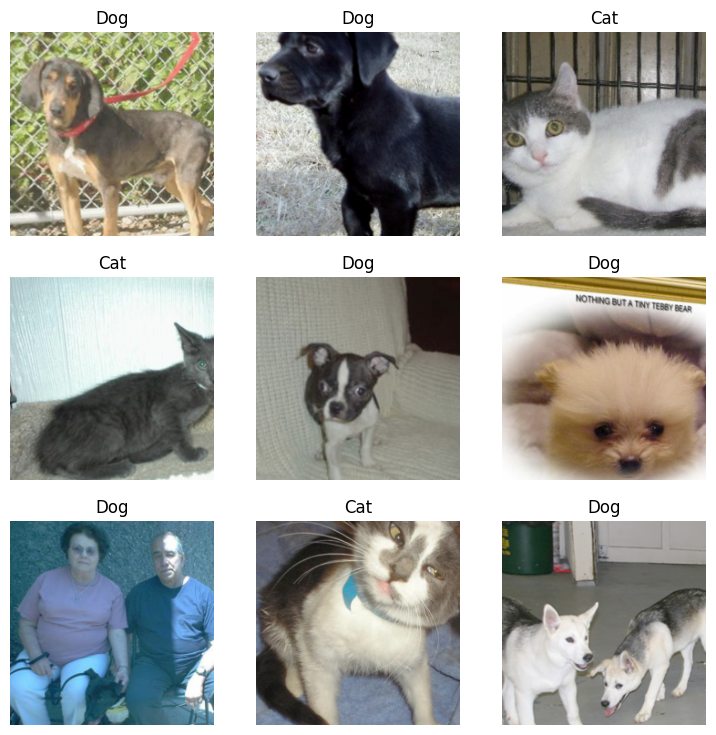

In [ ]:
dls.show_batch()

### Create resnet34 model

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

### Training

In [ ]:
learn.fine_tune(1, cbs=SaveModelCallback())

epoch,train_loss,valid_loss,error_rate,time
0,0.096102,0.049038,0.016003,01:47


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Better model found at epoch 0 with valid_loss value: 0.04903776943683624.


epoch,train_loss,valid_loss,error_rate,time
0,0.052834,0.027569,0.008002,01:42


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Better model found at epoch 0 with valid_loss value: 0.027569252997636795.


### Save model to local

In [ ]:
learn.export('/content/PetImages/model.pkl')

### Predict

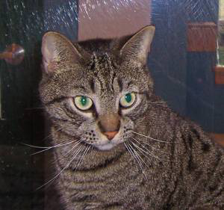

Predicted class: Cat
Prediction probabilities:
Cat: 1.00
Dog: 0.00


In [ ]:
# Define the data path
path = Path('/content/PetImages')

# Load the trained model
learn = load_learner(path / 'model.pkl')

# Function to predict the class of an image and display it
def predict_and_display_image(image_path):
    img = PILImage.create(image_path)
    pred, pred_idx, probs = learn.predict(img)
    display(img.to_thumb(224, 224))
    print(f"Predicted class: {pred}")
    print("Prediction probabilities:")
    for cls, prob in zip(learn.dls.vocab, probs):
        print(f"{cls}: {prob.item():.2f}")

# Test the model on a new image
image_path = '/content/PetImages/Cat/1.jpg'  # Replace with your own image path
predict_and_display_image(image_path)

### Gradio

In [ ]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 6.2 MB/s eta 0:00

In [ ]:
def predict_cat_or_dog(img):
  pred, pred_idx, probs = learn.predict(img)
  prob_test = ''
  for cls, prob in zip(learn.dls.vocab, probs):
        prob_test += f"{cls}: {prob.item():.2f}\n"
  return f"Predicted class: {pred}\n" + prob_test

In [ ]:
import gradio

gradio.Interface(predict_cat_or_dog, "image", "text").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d9f030c2543d7e440a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
